# LabAst577 - Observational Astronomy
# Notebook with some basic data reduction and analysis with python 

## First, import necessary libraries

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits

In [29]:
import os
cwd = os.getcwd()
dir = cwd + '/Data/Selected_data/23_10_2019/Flat'



## Let's open fits files

In [36]:
#dir = 'astro_lab/Santiago/Data/Selected_data/23_10_2019/Flat/' # directory where fits files are found
file1= dir + '/35/flat_2019-10-23_18-09-03_Red_0015.fits'
file2 = dir + '/35/flat_2019-10-23_18-09-21_Red_0016.fits'
head1, head2= fits.getheader(file1),fits.getheader(file2)
flat1, flat2= fits.getdata(file1),fits.getdata(file2)


## Plot fits files

Text(0, 0.5, 'ypix')

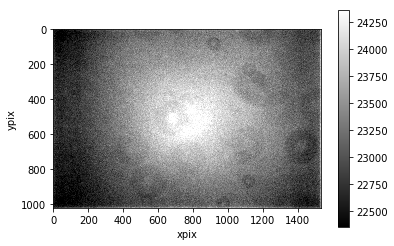

In [37]:
#one plot
lo,up = np.percentile(flat1,1),np.percentile(flat1,99)
plt.figure()
plt.imshow(flat1,cmap='gray',clim=(lo,up))
plt.colorbar()
plt.xlabel('xpix')
plt.ylabel('ypix')

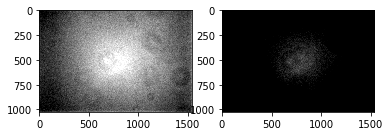

In [38]:
#two plots
fig,ax = plt.subplots(1,2)
ax[0].imshow(flat1,cmap='gray',clim=(lo,up))
ax[1].imshow(flat2,cmap='gray',clim=(lo,up))

## Stack two images

In [39]:
allflat = np.asarray([flat1,flat2])
medianflat,meanflat,sumflat = np.median(allflat,axis=0),np.mean(allflat,axis=0),np.sum(allflat,axis=0)

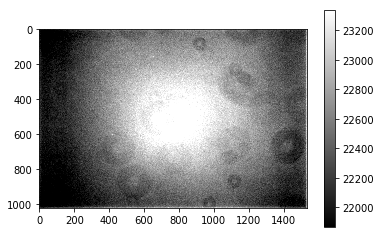

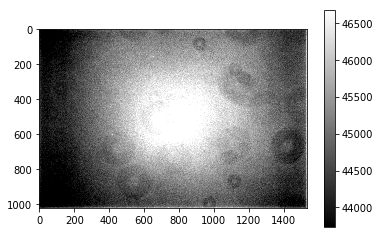

In [40]:
#plot them
lo,up = np.percentile(medianflat,5),np.percentile(medianflat,95)
plt.figure()
plt.imshow(medianflat,cmap='gray',clim=(lo,up))
plt.colorbar()
lo,up = np.percentile(sumflat,5),np.percentile(sumflat,95)
plt.figure()
plt.imshow(sumflat,cmap='gray',clim=(lo,up))
plt.colorbar()

## Shift image to align with another

In [41]:
#First load two other images: 
data1 = fits.getdata(dir+'hip93124_2019-10-25_19-12-11_Green_0187.fits')
data2 = fits.getdata(dir+'hip93124_2019-10-25_19-19-44_Green_0220.fits')
head2 = fits.getheader(dir+'hip93124_2019-10-25_19-19-44_Green_0220.fits')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/laurienroest/astro_lab/Santiago/Data/Selected_data/23_10_2019/Flathip93124_2019-10-25_19-12-11_Green_0187.fits'

In [ ]:
## Obtain rough position with the mouse
pos1 = [818,615]
pos2 = [841,621]

In [ ]:
## Get centroid
from photutils import centroid_com, centroid_2dg  #load centroid libraries
subdata1 = data1[pos1[1]-30:pos1[1]+30,pos1[0]-30:pos1[0]+30]#select subportion of 60x60 image
subdata2 = data2[pos2[1]-30:pos2[1]+30,pos2[0]-30:pos2[0]+30]#select subportion of 60x60 image
plt.imshow(subdata1)
center1,center2 = centroid_2dg(subdata1)+pos1-[30,30],centroid_2dg(subdata2)+pos2-[30,30]
ccenter1,ccenter2 = centroid_com(subdata1)+pos1-[30,30],centroid_com(subdata2)+pos2-[30,30]
print(center1,center2)
print(ccenter1,ccenter2)

In [ ]:
## Shift image
shiftdat = np.roll(data2,-np.int(np.round(center2[1]-center1[1])),axis=0) #shift in y
shiftdata2 = np.roll(shiftdat,-np.int(np.round(center2[0]-center1[0])),axis=1) #shift in x

In [ ]:
## Save image
head2['PROCESS'] = 'shifted'
fits.writeto(dir+'hip93124_2019-10-25_19-19-44_Green_0220_shifted.fits',shiftdata2,head2,overwrite=True)

## Get background and background noise

In [ ]:
#Load an image
image = fits.getdata(dir+'ngc6946_2019-10-25_20-23-17_black_0327.fits')

In [ ]:
from photutils import Background2D,MedianBackground
from astropy.stats import SigmaClip
sigma_clip = SigmaClip(sigma=3.0) 
bkg_estimator = MedianBackground()
bkg = Background2D(image,(50,50),filter_size=(3,3),sigma_clip=sigma_clip,
                   bkg_estimator=bkg_estimator)
print("      Median background found: %f, median bkg noise: %f"
      %(bkg.background_median,bkg.background_rms_median)  )

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
lo,up = np.percentile(image,1),np.percentile(image,99)
ax[0].imshow(image,cmap='gray',clim=(lo,up))
ax[1].imshow(bkg.background,cmap='gray',clim=(lo,up))
lo,up = np.percentile(image-bkg.background,1),np.percentile(image-bkg.background,99)
ax[2].imshow(image-bkg.background,cmap='gray',clim=(lo,up))

In [ ]:
plt.imshow(bkg.background_rms,cmap='gray')
plt.colorbar()

## Get astrometry with astrometry.net

In [ ]:
#Run a command on terminal
import os
ra,dec = '20:34:52.3', '+60:09:14'
file = 'ngc6946_2019-10-25_20-23-17_black_0327.fits'
outfile = 'ngc6946_2019-10-25_20-23-17_black_0327_astrometry.fits'
os.system("solve-field --ra "+str(ra)+" --dec "+str(dec)+
          " --radius 0.5 --dir "+dir+" --new-fits "+dir+outfile+
          " --cpulimit 1800 "+file)#--overwrite

## Other tools

### Better alignment:
https://github.com/toros-astro/astroalign

### RGB color composite:
http://docs.astropy.org/en/stable/visualization/rgb.html

### To do aperture photometry:
https://photutils.readthedocs.io/en/stable/aperture.html

### To do PSF photometry:
https://photutils.readthedocs.io/en/stable/psf.html

### To do surface photometry:
https://photutils.readthedocs.io/en/stable/isophote.html

### To analyze time-series:
https://docs.astropy.org/en/stable/timeseries/

### On model fitting:
https://emcee.readthedocs.io/en/stable/tutorials/line/